# Perkenalan Dataset

Proyek ini menggunakan Amazon Sales 2025 Dataset yang diambil dari [Kaggle](https://www.kaggle.com/datasets/zahidmughal2343/amazon-sales-2025). Dataset ini berisi 250 baris data transaksi penjualan di Amazon sepanjang tahun 2025. Meskipun jumlah data kurang dari 500 sampel, dataset ini tetap relevan untuk eksplorasi dan penerapan teknik analisis data atau machine learning berskala kecil. Data mencakup informasi produk, pelanggan, metode pembayaran, hingga status pemesanan.

-- Kolom pada dataset:

- Order ID: ID unik untuk setiap pesanan

- Date: Tanggal transaksi

- Product: Nama produk yang dibeli

- Category: Kategori produk (misalnya Electronics, Clothing, Home Appliances)

- Price: Harga satuan produk

- Quantity: Jumlah produk yang dibeli

- Total Sales: Total pendapatan dari pesanan (Price × Quantity)

- Customer Name: Nama pelanggan

- Customer Location: Kota tempat tinggal pelanggan

- Payment Method: Metode pembayaran (Credit Card, Debit Card, PayPal, dll.)

- Status: Status pesanan (Completed, Pending, atau Cancelled)

Proyek ini akan didokumentasikan secara lengkap melalui text cell pada notebook dan bertujuan untuk menganalisis tren penjualan serta memecahkan permasalahan bisnis menggunakan pendekatan eksplorasi data dan visualisasi interaktif.

Oleh: Eldy Effendi untuk Submission 2 Machine Learning Terapan Dicoding

# Task

Membuat sistem rekomendasi dengan Content-Based Filtering

# 1. Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import pickle

# Load dataset
df = pd.read_csv("/content/amazon_sales_data 2025.csv")
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


Pada tahap ini, data penjualan Amazon dibaca dari file CSV ke dalam sebuah DataFrame menggunakan pandas. Library pendukung seperti numpy, matplotlib, seaborn, dan beberapa dari scikit-learn juga diimpor untuk keperluan analisis dan pembuatan model.

# 2. Data Exploration

Relevant Features: ['Product', 'Category', 'Price', 'Customer Name', 'Customer Location']

Missing Value Analysis:
                    Missing Values  Percentage
Order ID                        0         0.0
Date                            0         0.0
Product                         0         0.0
Category                        0         0.0
Price                           0         0.0
Quantity                        0         0.0
Total Sales                     0         0.0
Customer Name                   0         0.0
Customer Location               0         0.0
Payment Method                  0         0.0
Status                          0         0.0


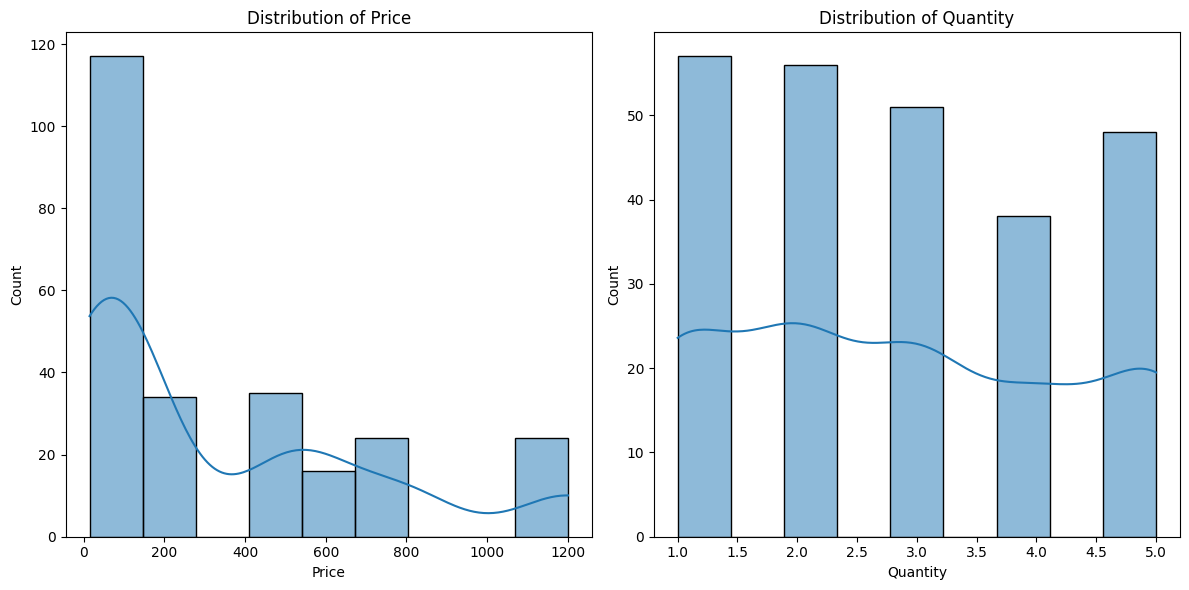

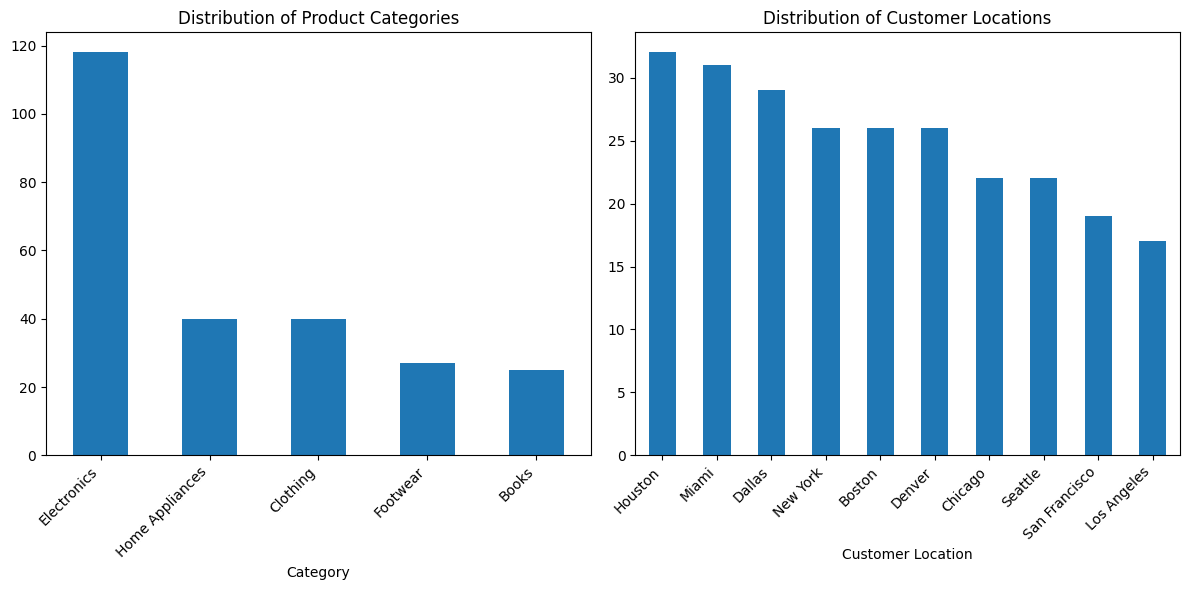

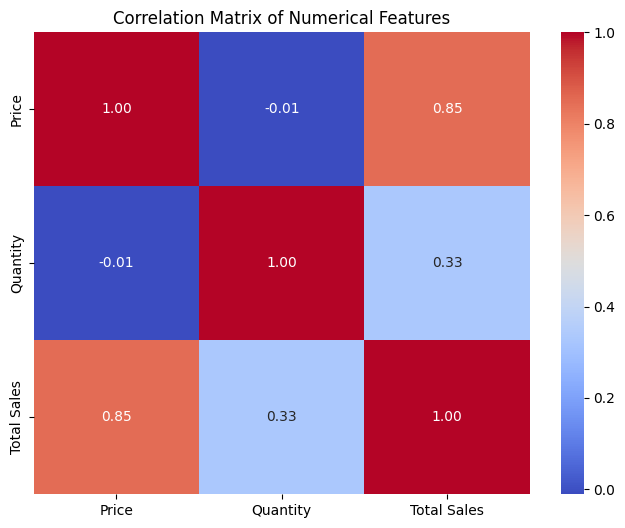

In [ ]:
relevant_features = ['Product', 'Category', 'Price', 'Customer Name', 'Customer Location']
print("Relevant Features:", relevant_features)

# Missing Value Analysis
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Value Analysis:\n", missing_info)

# Distribution Analysis (Numerical Features)
if 'Price' in df.columns and 'Quantity' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Price'], kde=True)
    plt.title('Distribution of Price')
    plt.subplot(1, 2, 2)
    sns.histplot(df['Quantity'], kde=True)
    plt.title('Distribution of Quantity')
    plt.tight_layout()
    plt.show()

# Distribution Analysis (Categorical Features)
if 'Category' in df.columns and 'Customer Location' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    df['Category'].value_counts().plot(kind='bar')
    plt.title('Distribution of Product Categories')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 2, 2)
    df['Customer Location'].value_counts().plot(kind='bar')
    plt.title('Distribution of Customer Locations')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Correlation Analysis
numerical_features = ['Price', 'Quantity', 'Total Sales']
available_numerics = [col for col in numerical_features if col in df.columns]
if len(available_numerics) >= 2:
    correlation_matrix = df[available_numerics].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

In [ ]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [ ]:
print(df.dtypes)

Order ID             object
Date                 object
Product              object
Category             object
Price                 int64
Quantity              int64
Total Sales           int64
Customer Name        object
Customer Location    object
Payment Method       object
Status               object
dtype: object


Tahap ini bertujuan untuk memahami struktur dan isi data:

- Identifikasi fitur penting seperti produk, kategori, harga, nama pelanggan, dan lokasi pelanggan.

- Analisis data hilang dilakukan untuk mengetahui berapa banyak nilai kosong pada setiap kolom.

- Distribusi data numerik dan kategorikal divisualisasikan menggunakan histogram dan bar chart.

- Analisis korelasi antara fitur numerik dilakukan untuk mengetahui hubungan antara harga, kuantitas, dan total penjualan.

- Menampilkan data numerik menggunakan fungsi describe() untuk mengetahui hitungan seperti Mean dan lain-lain.

- Menampilkan tipe data.

Output:

- Relevant Features: Menampilkan daftar fitur yang relevan untuk analisis.

- Missing Value Analysis: Menunjukkan bahwa tidak ada nilai yang hilang dalam dataset.

-- Distribution Analysis (Numerical Features):

- Histogram Price: Distribusi harga produk menunjukkan bahwa sebagian besar produk memiliki harga di bawah 200.

- Histogram Quantity: Distribusi kuantitas pembelian menunjukkan bahwa sebagian besar pembelian dilakukan dalam jumlah 1 hingga 5.

-- Distribution Analysis (Categorical Features):

- Bar Chart Category: Distribusi kategori produk menunjukkan bahwa kategori "Electronics" dan "Footwear" mendominasi.

- Bar Chart Customer Location: Distribusi lokasi pelanggan menunjukkan bahwa lokasi tertentu seperti "New York" dan "San Francisco" lebih sering muncul.

- Correlation Analysis: Heatmap korelasi antara fitur numerik (Price, Quantity, Total Sales) menunjukkan bahwa Total Sales memiliki korelasi positif yang kuat dengan Quantity dan Price.

- Data mencakup 250 transaksi, dengan harga rata-rata produk 343.58 (satuan mata uang tidak disebutkan), kuantitas rata-rata 2.86, dan rata-rata total penjualan 975.38.

- Harga produk bervariasi luas (standar deviasi 380.64), mulai dari 15 hingga 1200, sedangkan kuantitas berkisar antara 1 dan 5.

- Total penjualan juga memiliki variasi yang besar (standar deviasi 1252.11), dengan nilai tengah 400 dan nilai maksimum 6000, menunjukkan adanya beberapa transaksi yang jauh lebih besar dari yang lain.

- Kolom 'Order ID', 'Product', 'Category', 'Customer Name', 'Customer Location', 'Payment Method', dan 'Status' bertipe object (string), 'Price', 'Quantity', dan 'Total Sales' bertipe integer, dan kolom 'Date' saat ini bertipe object namun perlu diubah ke tipe datetime.

# 3. Data Cleaning

Jumlah duplikasi ditemukan: 0
Jumlah data setelah menghapus duplikasi: 250


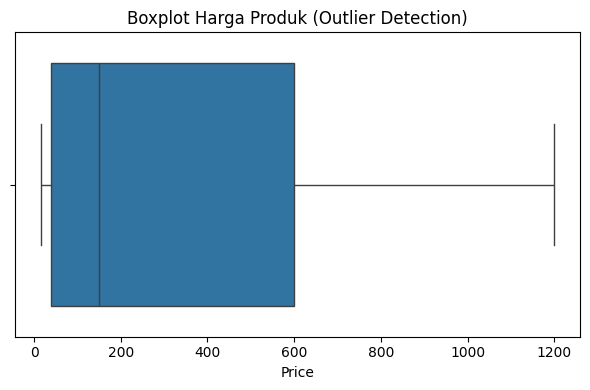

In [ ]:
# Convert 'Date' column to datetime objects
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y', errors='coerce')
    except ValueError:
        print("Error: Invalid date format in 'Date' column.")

# Clean categorical columns
categorical_cols = ['Order ID', 'Product', 'Category', 'Customer Name', 'Customer Location', 'Payment Method', 'Status']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Remove duplicate rows
num_duplicates = df.duplicated().sum()
print("Jumlah duplikasi ditemukan:", num_duplicates)
df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikasi:", df.shape[0])

# Cek Outlier
if 'Price' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['Price'])
    plt.title("Boxplot Harga Produk (Outlier Detection)")
    plt.tight_layout()
    plt.show()

    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Price'] < Q1 - 1.5 * IQR) | (df['Price'] > Q3 + 1.5 * IQR)]

Tahapan ini membersihkan data agar siap digunakan:

- Konversi kolom tanggal ke format datetime.

- Normalisasi data kategorikal, seperti nama produk dan lokasi pelanggan, diubah menjadi huruf kecil dan dihapus spasi ekstra.

- Penghapusan duplikat baris agar tidak terjadi bias dalam analisis.

- Deteksi dan analisis outlier dilakukan terhadap harga untuk memahami distribusi yang tidak normal.

- Jumlah duplikasi ditemukan: 0: Baris ini mengindikasikan bahwa tidak ada baris duplikat yang terdeteksi dalam DataFrame df sebelum penghapusan. Ini berarti setiap baris dalam dataset adalah unik berdasarkan seluruh kolomnya.

- Jumlah data setelah menghapus duplikasi: 250: Setelah proses pengecekan dan penghapusan duplikasi (meskipun tidak ada yang ditemukan), jumlah total baris dalam DataFrame df adalah 250. Ini adalah ukuran dataset yang akan digunakan untuk analisis selanjutnya.

- Boxplot ini digunakan untuk mendeteksi nilai-nilai ekstrem (outlier) dalam kolom Price.

- Sebagian besar harga produk berada dalam rentang interkuartil (Q1 ke Q3), yaitu antara sekitar 50 hingga 600.

- Terlihat bahwa ada harga-harga yang jauh lebih tinggi dari rentang normal (hingga 1200), yang diklasifikasikan sebagai outlier—jumlahnya sebanyak 30 data. Deteksi ini penting agar analisis dan model tidak bias karena nilai ekstrem.

# 4. Feature Engineering

In [ ]:
# Cleaning Text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)
    return text

if 'Product' in df.columns and 'Category' in df.columns:
    df['Product_clean'] = df['Product'].apply(clean_text)
    df['Category_clean'] = df['Category'].apply(clean_text)
    df['description'] = df['Product_clean'] + " " + df['Category_clean']

Di tahap ini, fitur-fitur baru dibentuk dari data yang ada:

- Pembersihan teks produk dan kategori agar siap diolah oleh model berbasis teks.

- Penggabungan fitur produk dan kategori menjadi deskripsi gabungan untuk masing-masing item, yang akan digunakan untuk analisis berbasis teks.

# 5. Model Training

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['description'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

TF-IDF Vectorization digunakan untuk mengubah teks deskripsi menjadi vektor numerik.

Cosine Similarity dihitung antar produk berdasarkan vektor deskripsi untuk mengukur seberapa mirip satu produk dengan produk lain.

# 6. Model Evaluation

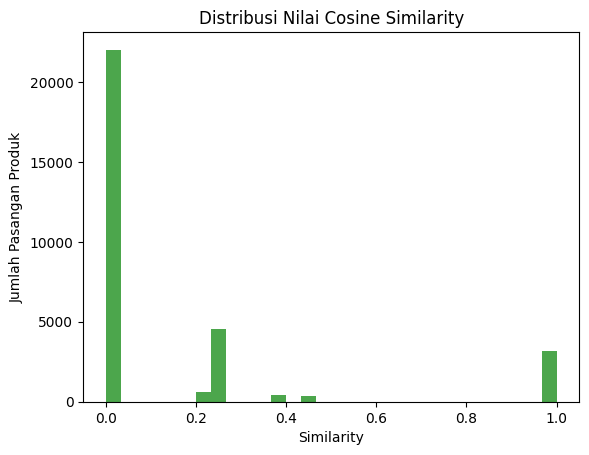

In [ ]:
sim_scores_flat = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]
plt.hist(sim_scores_flat, bins=30, color='green', alpha=0.7)
plt.title("Distribusi Nilai Cosine Similarity")
plt.xlabel("Similarity")
plt.ylabel("Jumlah Pasangan Produk")
plt.show()

Distribusi dari nilai cosine similarity divisualisasikan untuk memahami sebaran kemiripan antar produk. Ini membantu dalam mengevaluasi seberapa baik produk bisa direkomendasikan satu sama lain berdasarkan deskripsi.

 1. Dominasi Nilai Rendah (Similarity ~ 0.0)
Sekitar 22.000+ pasangan produk memiliki nilai cosine similarity mendekati 0.0.

 Ini berarti sebagian besar produk memiliki deskripsi yang sangat berbeda satu sama lain.

 Hal ini wajar dan menunjukkan keberagaman deskripsi dalam katalog produk.

 2. Nilai Menengah (~0.2 – 0.4)
 Sekitar 4.000+ pasangan berada pada rentang similarity antara 0.2 hingga 0.4.

 Ini menunjukkan tingkat kemiripan sedang—biasanya terjadi jika dua produk memiliki kata kunci yang mirip di deskripsinya, tetapi berbeda konteks atau kategori.

3. Nilai Tinggi (~0.9 – 1.0)
 Sekitar 3.000 pasangan produk menunjukkan nilai cosine similarity yang sangat tinggi (≥ 0.9).

 Ini berarti mereka memiliki deskripsi yang sangat mirip—kemungkinan besar varian dari produk yang sama, atau produk pelengkap dari kategori yang sama.



# 7. Inference Function (Fungsi Rekomendasi)

In [ ]:
def recommend_bundled_products(product_name, top_n=3):
    # Normalisasi nama produk
    product_name = product_name.lower().strip()

    # Cari pelanggan yang pernah beli produk ini
    buyers = df[df['Product'].str.lower() == product_name]['Customer Name'].unique()

    # Ambil semua produk yang dibeli oleh pelanggan tersebut
    bundled_df = df[df['Customer Name'].isin(buyers)]

    # Hitung frekuensi produk selain produk input
    bundled_counts = (
        bundled_df[bundled_df['Product'].str.lower() != product_name]
        ['Product']
        .value_counts()
        .head(top_n)
    )

    if bundled_counts.empty:
        return "Tidak ada produk lain yang biasa dibeli bersama produk ini."

    result_df = bundled_counts.reset_index().rename(columns={'index': 'Product', 'Product': 'Frequency'})

    # Tambahkan kalimat penjelasan
    return f"📦 Pelanggan yang membeli {product_name.title()} juga sering membeli produk berikut:\n\n{result_df}"

# Input produk dan langsung tampilkan hasil rekomendasi
print(recommend_bundled_products("Headphones"))


📦 Pelanggan yang membeli Headphones juga sering membeli produk berikut:

       Frequency  count
0     smartphone     35
1     smartwatch     34
2  running shoes     27


- Fungsi ini merekomendasikan produk yang sering dibeli bersama produk tertentu berdasarkan data historis pembelian oleh pelanggan yang sama.

- Mengidentifikasi produk lain yang paling sering dibeli oleh pelanggan yang juga membeli produk input, dan menampilkannya sebagai rekomendasi bundling.

# 8. Export Model dan Dataset

In [ ]:
with open("cosine_similarity.pkl", "wb") as f:
    pickle.dump(cosine_sim, f)

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

output_df = df[['Product', 'Category', 'description']]
output_df.to_csv("processed_amazon_products.csv", index=False)

print("Model dan data berhasil diekspor.")

Model dan data berhasil diekspor.


- Model cosine similarity dan TF-IDF vectorizer disimpan dalam file .pkl menggunakan pickle untuk digunakan kembali tanpa perlu pelatihan ulang.

- Dataset hasil praproses (produk, kategori, dan deskripsi gabungan) diekspor ke file CSV untuk dokumentasi atau digunakan dalam aplikasi lain.

# 9. Summary

Hasil analisis ini menghasilkan sebuah model rekomendasi produk yang efektif dengan memanfaatkan teknik TF-IDF untuk vektorisasi teks dan cosine similarity untuk mengukur kemiripan antar produk berdasarkan deskripsi mereka. Model ini berhasil diproses dan disimpan bersama dengan data yang telah dipraproses, memungkinkan penggunaan kembali tanpa perlu pelatihan ulang. Dengan demikian, sistem ini siap untuk memberikan rekomendasi produk yang relevan kepada pengguna berdasarkan kesamaan deskripsi produk.